In [2]:
import spacy
nlp=spacy.load('en_core_web_sm')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
! pip install -q kaggle
from google.colab import files

files.upload()
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! mkdir Dataset

Saving kaggle.json to kaggle.json


In [4]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

 81% 33.0M/41.0M [00:00<00:00, 39.8MB/s]
100% 41.0M/41.0M [00:00<00:00, 76.2MB/s]


In [5]:
!unzip fake-and-real-news-dataset -d Dataset

Archive:  fake-and-real-news-dataset.zip
  inflating: Dataset/Fake.csv        
  inflating: Dataset/True.csv        


In [75]:
df_fake=pd.read_csv('/content/Dataset/Fake.csv')

In [76]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [77]:
df_fake['type']='Fake'

In [78]:
df_fake.head()

,title,text,subject,date,type
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [79]:
len(df_fake)

23481

In [80]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
type       0
dtype: int64

In [81]:
df_true=pd.read_csv('/content/Dataset/True.csv')

In [82]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [83]:
df_true['type']='True'

In [84]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
type       0
dtype: int64

In [85]:
len(df_true)

21417

In [86]:
df_true.head()

,title,text,subject,date,type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [87]:
df=pd.concat([df_fake,df_true])

In [88]:
df.head()

,title,text,subject,date,type
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [89]:
df=df.sample(frac=1)

In [90]:
df.head()

,title,text,subject,date,type
987,Public Schools In Kentucky Can Now “Teach” Th...,The Republicans are at it again this time by...,News,"June 28, 2017",Fake
13941,WHOA! ROCK LEGEND Roger Daltrey Rips EU For “R...,WHO knew legendary rocker Roger Daltrey was su...,politics,"May 10, 2016",Fake
11247,Cheesy puns abound as White House hosts online...,(Reuters) - The White House attracted pungent ...,politicsNews,"January 13, 2016",True
13693,BREAKING: PUTIN TIRED OF WAITING FOR Obama’s D...,This is not the first time Putin has warned th...,politics,"Jun 14, 2016",Fake
17847,BREAKING…VP PENCE and Wife Karen Abruptly Leav...,Mike Pence tweeted about how he was looking fo...,left-news,"Oct 8, 2017",Fake


In [91]:
df.reset_index(inplace=True)

In [92]:
df.head()

,index,title,text,subject,date,type
0,987,Public Schools In Kentucky Can Now “Teach” Th...,The Republicans are at it again this time by...,News,"June 28, 2017",Fake
1,13941,WHOA! ROCK LEGEND Roger Daltrey Rips EU For “R...,WHO knew legendary rocker Roger Daltrey was su...,politics,"May 10, 2016",Fake
2,11247,Cheesy puns abound as White House hosts online...,(Reuters) - The White House attracted pungent ...,politicsNews,"January 13, 2016",True
3,13693,BREAKING: PUTIN TIRED OF WAITING FOR Obama’s D...,This is not the first time Putin has warned th...,politics,"Jun 14, 2016",Fake
4,17847,BREAKING…VP PENCE and Wife Karen Abruptly Leav...,Mike Pence tweeted about how he was looking fo...,left-news,"Oct 8, 2017",Fake


In [93]:
df.drop(['index'],axis=1,inplace=True)

In [94]:
df.head()

,title,text,subject,date,type
0,Public Schools In Kentucky Can Now “Teach” Th...,The Republicans are at it again this time by...,News,"June 28, 2017",Fake
1,WHOA! ROCK LEGEND Roger Daltrey Rips EU For “R...,WHO knew legendary rocker Roger Daltrey was su...,politics,"May 10, 2016",Fake
2,Cheesy puns abound as White House hosts online...,(Reuters) - The White House attracted pungent ...,politicsNews,"January 13, 2016",True
3,BREAKING: PUTIN TIRED OF WAITING FOR Obama’s D...,This is not the first time Putin has warned th...,politics,"Jun 14, 2016",Fake
4,BREAKING…VP PENCE and Wife Karen Abruptly Leav...,Mike Pence tweeted about how he was looking fo...,left-news,"Oct 8, 2017",Fake


In [95]:
df['len']=df['text'].apply(len)

In [96]:
df.head()

,title,text,subject,date,type,len
0,Public Schools In Kentucky Can Now “Teach” Th...,The Republicans are at it again this time by...,News,"June 28, 2017",Fake,2367
1,WHOA! ROCK LEGEND Roger Daltrey Rips EU For “R...,WHO knew legendary rocker Roger Daltrey was su...,politics,"May 10, 2016",Fake,2186
2,Cheesy puns abound as White House hosts online...,(Reuters) - The White House attracted pungent ...,politicsNews,"January 13, 2016",True,2362
3,BREAKING: PUTIN TIRED OF WAITING FOR Obama’s D...,This is not the first time Putin has warned th...,politics,"Jun 14, 2016",Fake,2839
4,BREAKING…VP PENCE and Wife Karen Abruptly Leav...,Mike Pence tweeted about how he was looking fo...,left-news,"Oct 8, 2017",Fake,3241


In [97]:
sns.set_style('darkgrid')

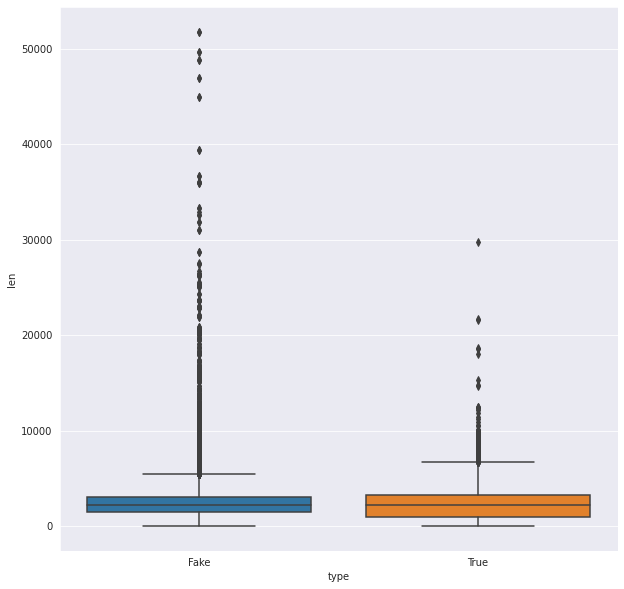

In [98]:
plt.figure(figsize=(10,10))
sns.boxplot(x='type',y='len',data=df)

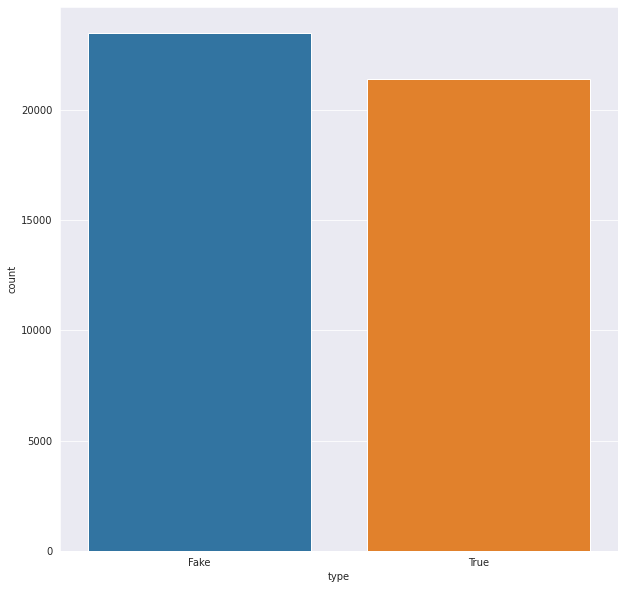

In [137]:
plt.figure(figsize=(10,10))
sns.countplot(x='type',data=df)

In [99]:
#Strip Punctuation and Removing Stop Words

In [100]:
df.iloc[0]['text']

'The Republicans are at it again   this time by passing a bill that will allow public schools in Kentucky to teach the Bible.WDRB reports that the man responsible for this is Gov. Matt Bevin. It was publicly signed at the Capitol on Tuesday. The bill, which easily passed the House and Senate, gives local school boards the option of developing a Bible literacy class as part of their social studies curriculum. The course is also meant to be an elective and not required.The bill s sponsor said students need to understand the role the Bible played in American history. It really did set the foundation that our founding fathers used to develop documents like the Declaration of Independence, the Constitution, the Bill of Rights,  said Rep. D.J. Johnson (R-Owensboro).  All of those came from principles from the Bible. Is actually examining the Bible truly necessary to look at American history? Will it even be an examination of the Bible? What about other religious texts? It smells more like a 

In [101]:
import re

In [102]:
k=re.findall(r'[^!@#$%&*..()_+=?/;,]+',df.iloc[0]['text'])

In [103]:
k=''.join(k)

In [104]:
k

'The Republicans are at it again   this time by passing a bill that will allow public schools in Kentucky to teach the BibleWDRB reports that the man responsible for this is Gov Matt Bevin It was publicly signed at the Capitol on Tuesday The bill which easily passed the House and Senate gives local school boards the option of developing a Bible literacy class as part of their social studies curriculum The course is also meant to be an elective and not requiredThe bill s sponsor said students need to understand the role the Bible played in American history It really did set the foundation that our founding fathers used to develop documents like the Declaration of Independence the Constitution the Bill of Rights  said Rep DJ Johnson R-Owensboro  All of those came from principles from the Bible Is actually examining the Bible truly necessary to look at American history Will it even be an examination of the Bible What about other religious texts It smells more like a guise to teach the Bib

In [105]:
def strip_punc(x):
  k=re.findall(r'[^!@#$%&*..()_+=?/;,]+',x)
  k=''.join(k)
  return k

In [106]:
df['text']=df['text'].apply(strip_punc)

In [107]:
df['text'].head()

0    The Republicans are at it again   this time by...
1    WHO knew legendary rocker Roger Daltrey was su...
2    Reuters - The White House attracted pungent wa...
3    This is not the first time Putin has warned th...
4    Mike Pence tweeted about how he was looking fo...
Name: text, dtype: object

In [108]:
df['new_len']=df['text'].apply(len)

In [109]:
df.head()

,title,text,subject,date,type,len,new_len
0,Public Schools In Kentucky Can Now “Teach” Th...,The Republicans are at it again this time by...,News,"June 28, 2017",Fake,2367,2312
1,WHOA! ROCK LEGEND Roger Daltrey Rips EU For “R...,WHO knew legendary rocker Roger Daltrey was su...,politics,"May 10, 2016",Fake,2186,2148
2,Cheesy puns abound as White House hosts online...,Reuters - The White House attracted pungent wa...,politicsNews,"January 13, 2016",True,2362,2305
3,BREAKING: PUTIN TIRED OF WAITING FOR Obama’s D...,This is not the first time Putin has warned th...,politics,"Jun 14, 2016",Fake,2839,2777
4,BREAKING…VP PENCE and Wife Karen Abruptly Leav...,Mike Pence tweeted about how he was looking fo...,left-news,"Oct 8, 2017",Fake,3241,3165


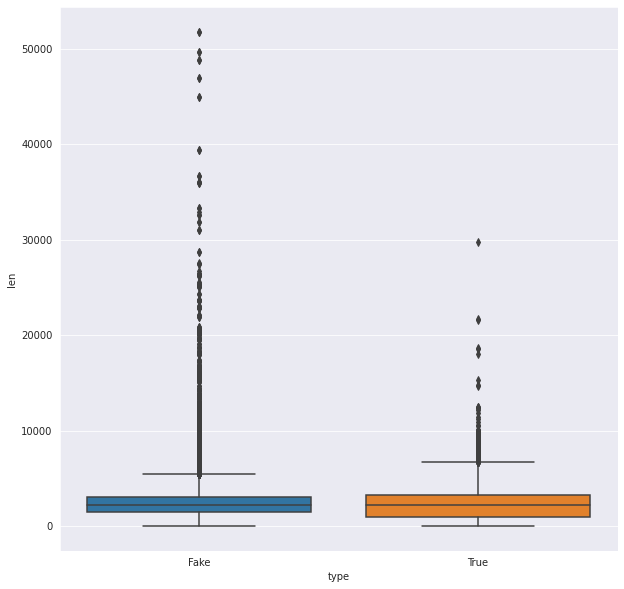

In [110]:
plt.figure(figsize=(10,10))
sns.boxplot(x='type',y='len',data=df)

In [111]:
stop=list((nlp.Defaults.stop_words))

In [112]:
x=df.iloc[0]['text']

In [113]:
len(x.split(" "))

422

In [114]:
new_text=[]
for y in x.split(' '):
  if y in stop:
    continue
  else:
    new_text.append(y)

In [115]:
len(new_text)

223

In [116]:
new_text=' '.join(new_text)

In [117]:
new_text

'The Republicans   time passing bill allow public schools Kentucky teach BibleWDRB reports man responsible Gov Matt Bevin It publicly signed Capitol Tuesday The bill easily passed House Senate gives local school boards option developing Bible literacy class social studies curriculum The course meant elective requiredThe bill s sponsor said students need understand role Bible played American history It set foundation founding fathers develop documents like Declaration Independence Constitution Bill Rights  said Rep DJ Johnson R-Owensboro  All came principles Bible Is actually examining Bible truly necessary look American history Will examination Bible What religious texts It smells like guise teach Bible s Sunday School public schoolsI m thinks The ACLU Kentucky said s concerned law schools A Bible literacy bill face appear unconstitutional fact unconstitutional implementation  said Advocacy Director Kate Miller  We want sure teachers teach sure don t preach  Miller saidMiller told WDRB

In [118]:
df=df[['text','type']]


In [119]:
df.head()

,text,type
0,The Republicans are at it again this time by...,Fake
1,WHO knew legendary rocker Roger Daltrey was su...,Fake
2,Reuters - The White House attracted pungent wa...,True
3,This is not the first time Putin has warned th...,Fake
4,Mike Pence tweeted about how he was looking fo...,Fake


In [181]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [182]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [183]:
pipe1_svc = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                      ('clf', LinearSVC()),
                     ])
pipe1_svc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
          

In [184]:
predictions = pipe1_svc.predict(X_test)


In [185]:
from sklearn import metrics

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      9430
        True       0.99      0.99      0.99      8530

    accuracy                           0.99     17960
   macro avg       0.99      0.99      0.99     17960
weighted avg       0.99      0.99      0.99     17960



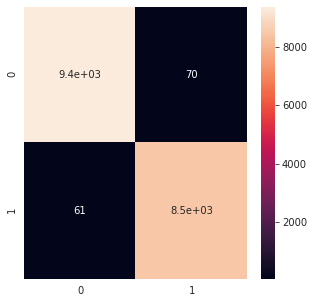

In [186]:
plt.figure(figsize=(5,5))
sns.heatmap(metrics.confusion_matrix(y_test,predictions),annot=True)
print(metrics.classification_report(y_test,predictions))

In [187]:
test=[]
test.append(df.iloc[2]['text'])

In [188]:
pipe1_svc.predict(test)

array(['True'], dtype=object)

In [189]:
import pickle
pickle.dump(pipe1_svc, open('svc_pipeline', 'wb'))

In [161]:
p=pickle.load(open('svc_pipeline','rb'))

In [163]:
p.predict([df.iloc[0]['text']])

array(['Fake'], dtype=object)

In [ ]:
#Naive Bayes

In [190]:
pipe2_nb = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                     ('clf', MultinomialNB()),
])

In [191]:
pipe2_nb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [192]:
predictions = pipe2_nb.predict(X_test)

              precision    recall  f1-score   support

        Fake       0.95      0.93      0.94      9430
        True       0.93      0.95      0.94      8530

    accuracy                           0.94     17960
   macro avg       0.94      0.94      0.94     17960
weighted avg       0.94      0.94      0.94     17960



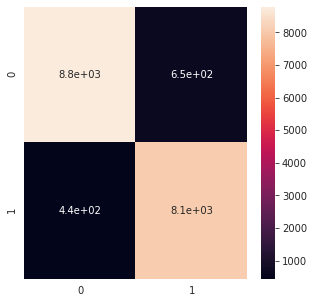

In [193]:
plt.figure(figsize=(5,5))
sns.heatmap(metrics.confusion_matrix(y_test,predictions),annot=True)
print(metrics.classification_report(y_test,predictions))

In [172]:
import pickle
pickle.dump(pipe1_svc, open('nb_pipeline', 'wb'))